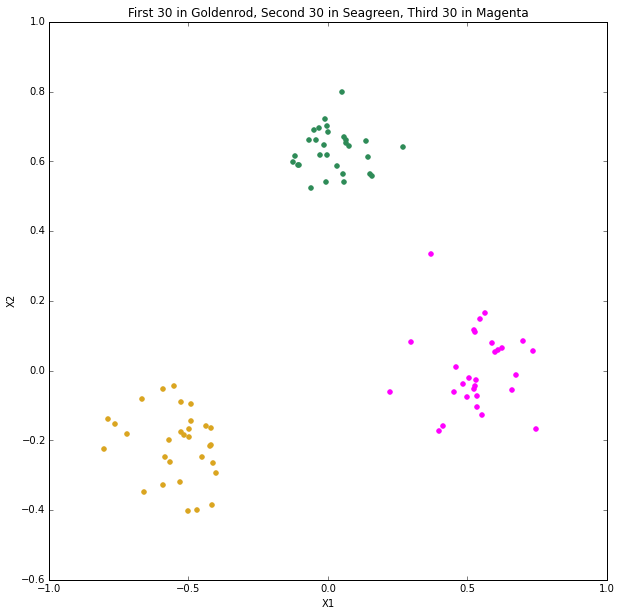

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy.linalg
#import scipy.spatial.distance
#import pandas as pd
#from PIL import Image
%matplotlib inline

data = np.zeros((2,90))
# center: (-0.5, -0.2)
data[0,0:30] = np.random.normal(-0.5, 0.1, 30)
data[1,0:30] = np.random.normal(-0.2, 0.1, 30)

# center: (0.0, 0.1)
data[0,30:60] = np.random.normal(0.0, 0.1, 30)
data[1,30:60] = np.random.normal(0.6, 0.1, 30)

# center: (-0.5, 0)
data[0,60:90] = np.random.normal(0.5, 0.1, 30)
data[1,60:90] = np.random.normal(0.0, 0.1, 30)

plt.figure(figsize=(10,10))
plt.scatter(data[0,0:30],data[1,0:30], color='goldenrod')
plt.scatter(data[0,31:60],data[1,31:60], color='seagreen')
plt.scatter(data[0,61:90],data[1,61:90], color='magenta')
ax = plt.gca()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('First 30 in Goldenrod, Second 30 in Seagreen, Third 30 in Magenta')
plt.show()

-1.13686837722e-13
D:
[  5.05056385e-16   4.17342693e-08   1.38813599e-07   3.04039793e-07
   4.94589924e-07   7.60217995e-07   8.02051001e-07   1.33079906e-06
   2.18300101e-06   2.61404316e-06   4.51328740e-06   5.79705981e-06
   7.85868925e-06   1.20095085e-05   1.27838062e-05   1.69471905e-05
   3.38696844e-05   5.04337216e-05   8.45736500e-05   1.22859564e-04
   1.22985074e-04   1.33155594e-04   2.34725677e-04   3.07793808e-04
   3.39472624e-04   4.92255897e-04   7.27210566e-04   8.03492524e-04
   8.95349394e-04   1.03954197e-03   1.90821147e-03   2.20638901e-03
   2.27836855e-03   2.95942130e-03   3.21062386e-03   3.41123205e-03
   4.60981056e-03   5.32719749e-03   8.02619559e-03   8.54645562e-03
   8.73300886e-03   1.03984791e-02   1.07842164e-02   1.26504750e-02
   1.28443940e-02   1.87081051e-02   2.47502953e-02   2.90599173e-02
   3.05773805e-02   3.62124689e-02   4.47571866e-02   4.54380026e-02
   4.98901539e-02   1.03776572e-01   1.08346595e-01   1.54949605e-01
   1.8113189

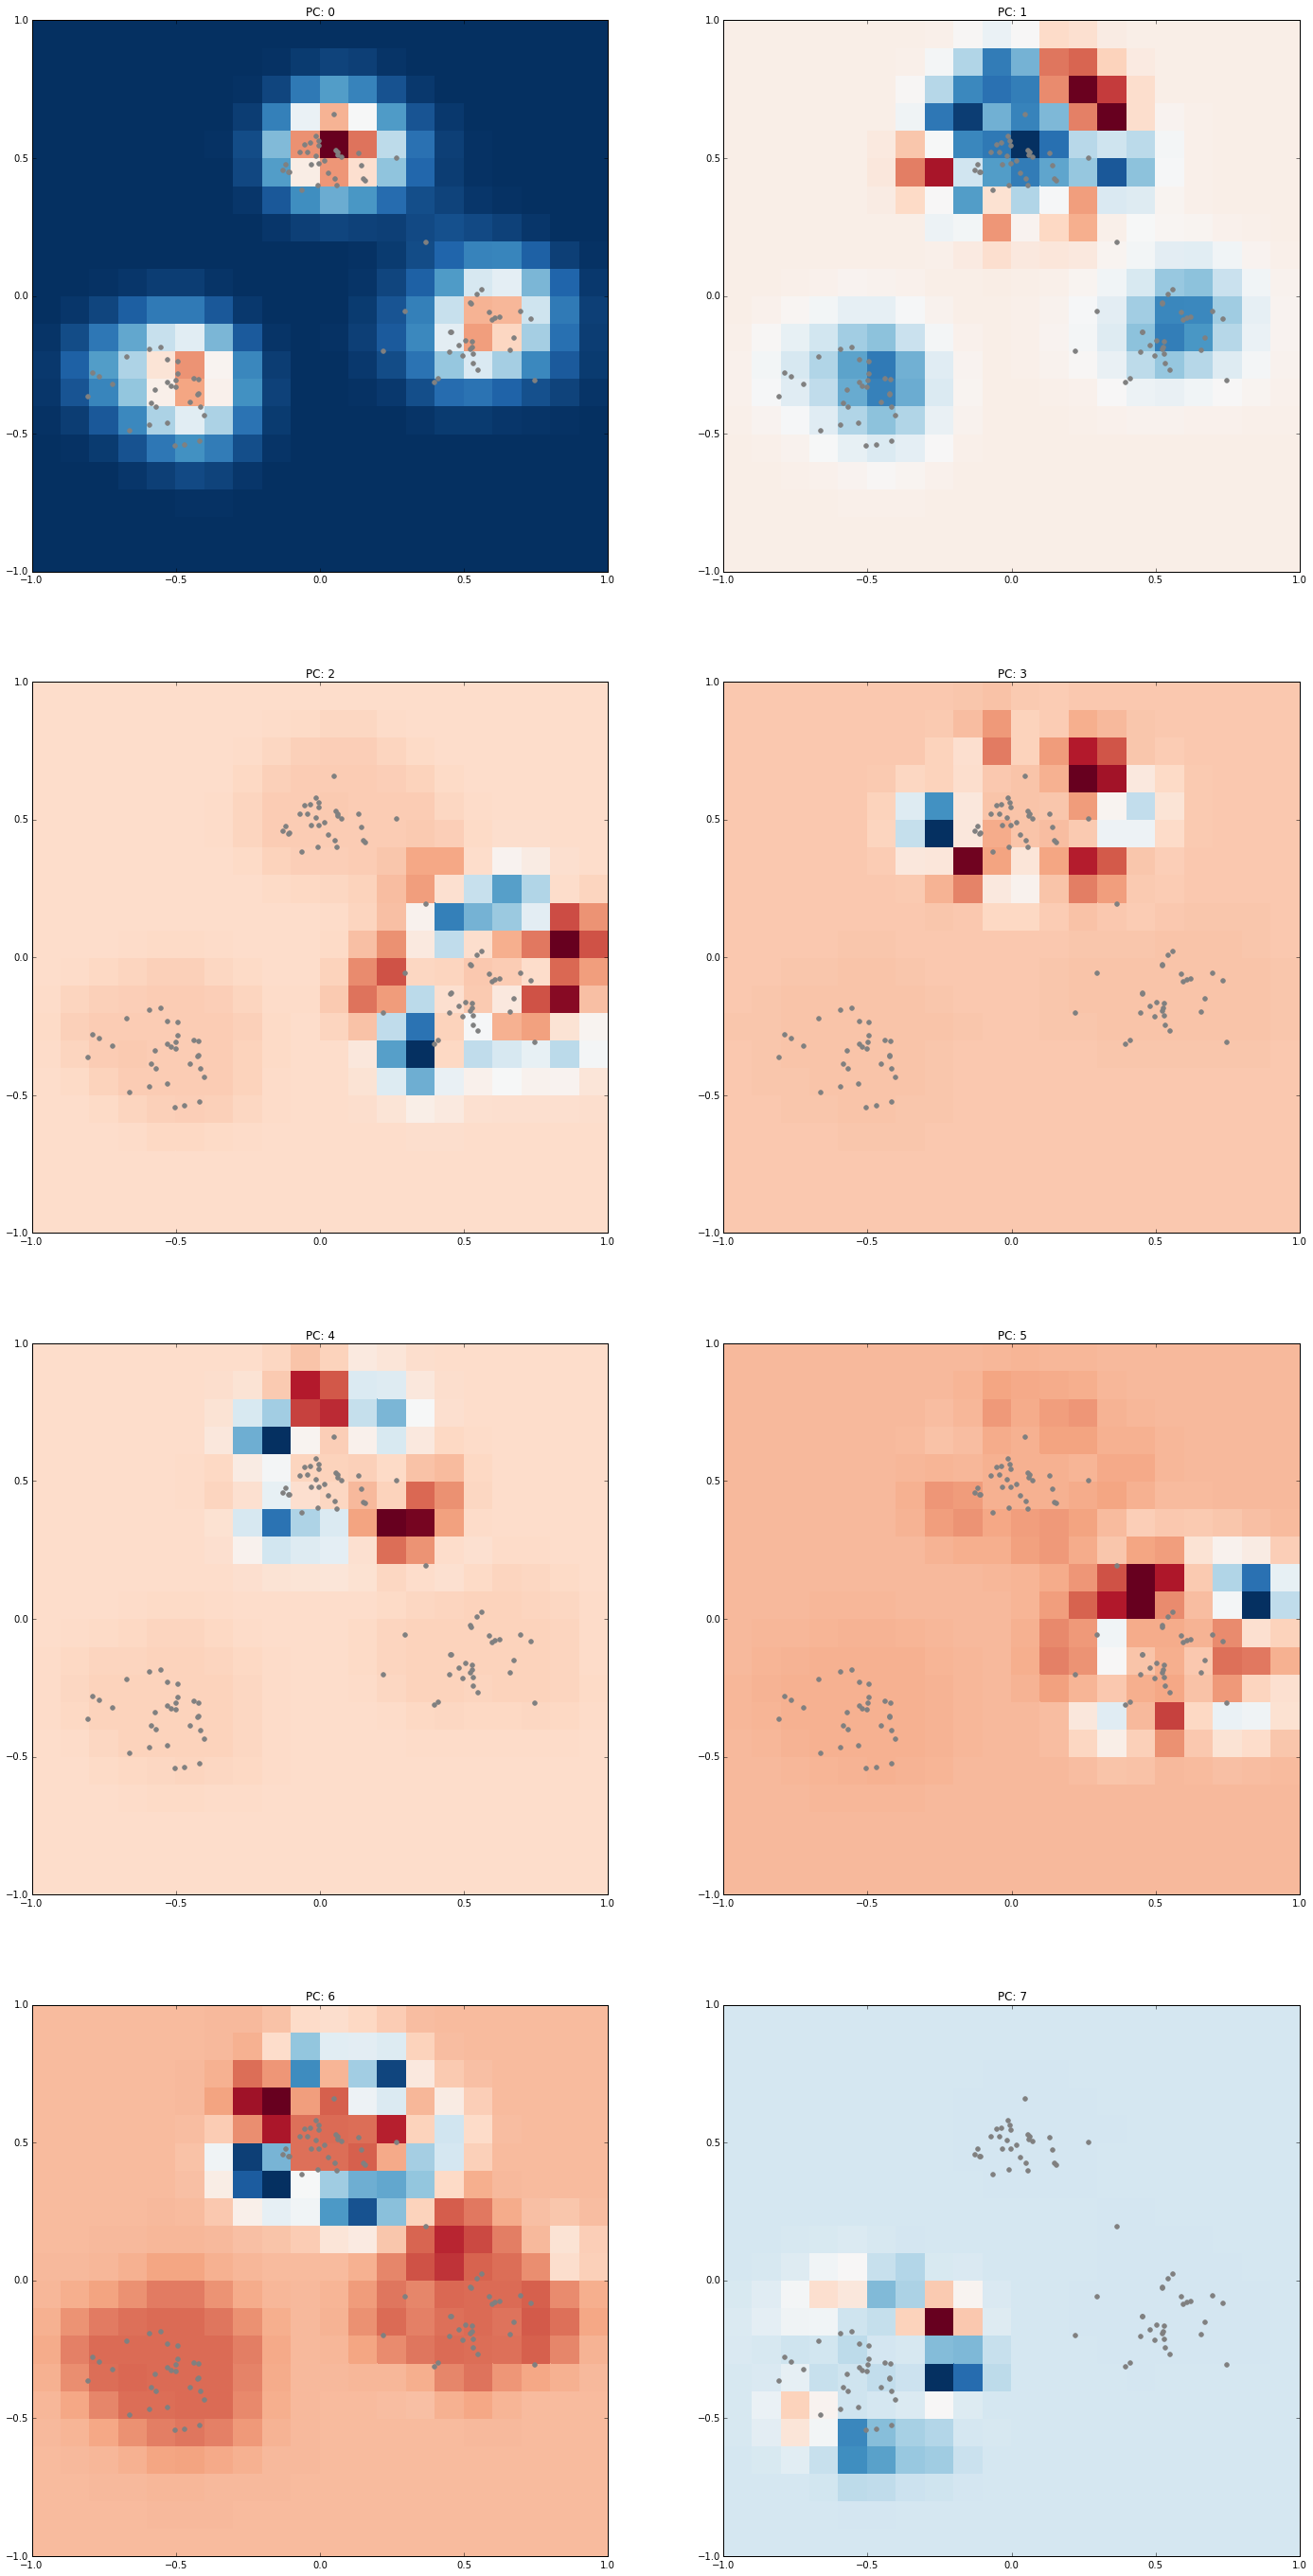

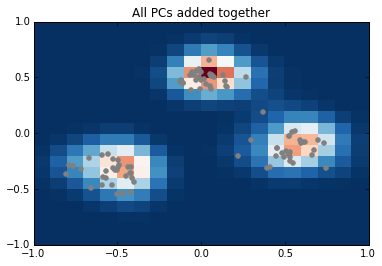

In [68]:
#(b)

#(0) center data
#print(np.mean(data.T, axis=0).shape)
datac = (data - np.mean(data.T, axis=0).reshape(-1,1)).T

#(1) calculate the unnormalized kernel matrix
sigma = .1
p = datac.shape[0]
#pxp
Ktilde = np.zeros( (p, p) )

for a in range(p):
    for b in range(p):
        Ktilde[a, b] = np.exp(- (np.power(np.linalg.norm(datac[a] - datac[b]), 2))/(2*np.power(sigma, 2)))

#(2) normalize to 0 mean
#K = K - rowavg - colavg + matrixavg
#print(Ktilde)
N = Ktilde.shape[0]
one_n = np.ones((N,N)) / N

#print( (Ktilde.sum(axis=0)/p).shape )
#print( (Ktilde.sum(axis=1)/p).shape )

K = Ktilde - one_n.dot(Ktilde) - Ktilde.dot(one_n) + one_n.dot(Ktilde).dot(one_n)
#K = Ktilde - Ktilde.sum(axis=0)/p - (Ktilde.sum(axis=1)/p) + Ktilde.sum()/np.power(p,2)
#K1 = Ktilde - (Ktilde.sum(axis=0)/p).reshape(1,-1) - (Ktilde.sum(axis=1)/p).reshape(-1,1) + Ktilde.sum()/np.power(p,2)
#K2 = Ktilde - (Ktilde.sum(axis=1)/p).reshape(1,-1) - (Ktilde.sum(axis=0)/p).reshape(-1,1) + Ktilde.sum()/np.power(p,2)
#K3 = Ktilde - (1/p)*(Ktilde.sum(axis=1).reshape(1,-1) - Ktilde.sum(axis=0).reshape(-1,1) + Ktilde.sum()/p)

#Kdiff = K-Kcorrect
#Kdiff1 = K1-Kcorrect
#Kdiff2 = K2-Kcorrect
Kdiff3 = K3-Kcorrect
#print(Kdiff.sum())
#print(Kdiff2.sum())
print(Kdiff3.sum())

#D0, U = np.linalg.eigh(Kcorrect)
#D, U = np.linalg.eigh(K)
#D1, U1 = np.linalg.eigh(K1)
#D2, U2 = np.linalg.eigh(K2)
#print("D0:")
#print(D0)
#print("D:")
#print(D)
#print("D1:")
#print(D1)
#print("D2:")
#print(D2)

#break


#(3) solve the eigenvalue problem
D, U = np.linalg.eigh(K)
Up = U.T[::-1]    #U is now row-wise PCs
Dsub = D[:][::-1]
Usub = U[:,:][::-1]
print("D:")
print(D)

#(4) normalize eigen vectors to unit length
Unorm = U / (np.sqrt(p * D) * np.linalg.norm(U))

#(5) project onto eigen vectors
proj = np.dot(Unorm.T, K)

#(c)
datam = np.zeros((1,2))
xs = np.arange(-1,1.1,.1)
ys = np.arange(-1,1.1,.1)
for x in xs:
    for y in ys:
        datam = np.vstack( (datam, [x, y]) )
datam = datam[1:]

Kbd = np.zeros( (p, len(datam)) )

for b in range(p):
    for d in range(len(datam)):
        Kbd[b, d] = np.exp(- (np.power(np.linalg.norm(datac[b] - datam[d]), 2))/(2*np.power(sigma, 2)))
Kbd2 = Kbd

'''
rowavg = Kbd.sum(axis=0)/Kbd.shape[1]
colavg = Kbd.sum(axis=1)/Kbd.shape[0]
matrixavg = Kbd.sum()/(Kbd.shape[0]*Kbd.shape[1])

for b in range(Kbd.shape[0]):
    Kbd[b,:] -= rowavg
for d in range(Kbd.shape[1]):
    Kbd[:,d] -= colavg
for b in range(Kbd.shape[0]):
    for d in range(Kbd.shape[1]):
        Kbd[b, d] += matrixavg

#Kbd2 = Kbd2 - rowavg.reshape(1,-1) - colavg.reshape(-1,1) + matrixavg
'''

onesl = np.ones( (p, p) )
onesr = np.ones( (len(datam), len(datam)) )

Kbd2 = Kbd2 - onesl.dot(Kbd2) - Kbd2.dot(onesr) + onesl.dot(Kbd2).dot(onesr)

#print((Kbd - Kbd2).sum())

'''
datap = np.dot(Unorm.T, Kbd)

fig, axarray = plt.subplots(4,2)
fig.set_figheight(48)
fig.set_figwidth(24)


for i in range(8):
    axarray[np.floor(i/2),i%2].pcolor(np.repeat(xs.reshape(-1,1), 21, axis=1), np.repeat(ys.reshape(1,-1), 21, axis=0), datap[i,:].reshape(21,21), cmap='RdBu')
    axarray[np.floor(i/2),i%2].scatter(datac.T[0], datac.T[1], color="grey")
    axarray[np.floor(i/2),i%2].set_title('PC: '+str(i))
    axarray[np.floor(i/2),i%2].axis([-1,1,-1,1])

plt.show()
    
plt.pcolor(np.repeat(xs.reshape(-1,1), 21, axis=1), np.repeat(ys.reshape(1,-1), 21, axis=0), datap.sum(axis=0).reshape(21,21), cmap='RdBu')
plt.scatter(datac.T[0], datac.T[1], color="grey")
plt.title('All PCs added together')
plt.axis([-1,1,-1,1])
plt.show()
'''



datap = np.dot(Unorm.T, Kbd2)

fig, axarray = plt.subplots(4,2)
fig.set_figheight(48)
fig.set_figwidth(24)


for i in range(8):
    axarray[np.floor(i/2),i%2].pcolor(np.repeat(xs.reshape(-1,1), 21, axis=1), np.repeat(ys.reshape(1,-1), 21, axis=0), datap[i,:].reshape(21,21), cmap='RdBu')
    axarray[np.floor(i/2),i%2].scatter(datac.T[0], datac.T[1], color="grey")
    axarray[np.floor(i/2),i%2].set_title('PC: '+str(i))
    axarray[np.floor(i/2),i%2].axis([-1,1,-1,1])

plt.show()
    
plt.pcolor(np.repeat(xs.reshape(-1,1), 21, axis=1), np.repeat(ys.reshape(1,-1), 21, axis=0), datap.sum(axis=0).reshape(21,21), cmap='RdBu')
plt.scatter(datac.T[0], datac.T[1], color="grey")
plt.title('All PCs added together')
plt.axis([-1,1,-1,1])
plt.show()




Each different PC seems to show a cluster.